In [197]:
#importar bibliotecas
#!pip install -U scikit-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression , Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,PolynomialFeatures,normalize
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
%matplotlib inline

In [198]:
df = pd.read_csv("dados/df2018_2022.csv", sep=",")
df[(df['temporada']<=2021)]

,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,mandante_placar,visitante_placar,clube_mandante,chutes_mandante,...,posse_de_bola_visitante,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado
0,4987,1,Chapecoense,Coritiba,4-2-3-1,3-5-2,2,1,Chapecoense,13,...,0.55,388,0.00,21,2,0,0,5,2015,1
1,4988,1,Palmeiras,Atletico-MG,4-2-3-1,4-2-3-1,2,2,Palmeiras,17,...,0.50,426,0.00,14,4,0,4,2,2015,3
2,4989,1,Fluminense,Joinville,4-3-1-2,4-4-1-1,1,0,Fluminense,26,...,0.26,250,0.00,14,0,1,1,3,2015,1
3,4990,1,Gremio,Ponte Preta,4-2-3-1,4-1-2-1-2,3,3,Gremio,11,...,0.55,473,0.00,21,4,1,0,10,2015,3
4,4991,1,Athletico-PR,Internacional,4-2-3-1,4-2-3-1,3,0,Athletico-PR,10,...,0.61,502,0.00,17,2,0,1,11,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,7641,38,Bragantino,Internacional,4-2-3-1,3-4-2-1,1,0,Bragantino,23,...,0.56,474,0.78,26,5,0,0,2,2021,1
2655,7642,38,Sport,Athletico-PR,4-2-3-1,3-4-2-1,1,1,Sport,18,...,0.37,338,0.81,14,1,0,0,4,2021,3
2656,7643,38,Juventude,Corinthians,3-4-3,4-3-3,1,0,Juventude,17,...,0.56,519,0.85,22,2,1,0,4,2021,1
2657,7644,38,Gremio,Atletico-MG,4-2-3-1,4-2-3-1,4,3,Gremio,7,...,0.63,548,0.88,11,1,0,0,9,2021,1


array([[<Axes: xlabel='mandante_placar', ylabel='mandante_placar'>,
        <Axes: xlabel='visitante_placar', ylabel='mandante_placar'>],
       [<Axes: xlabel='mandante_placar', ylabel='visitante_placar'>,
        <Axes: xlabel='visitante_placar', ylabel='visitante_placar'>]],
      dtype=object)

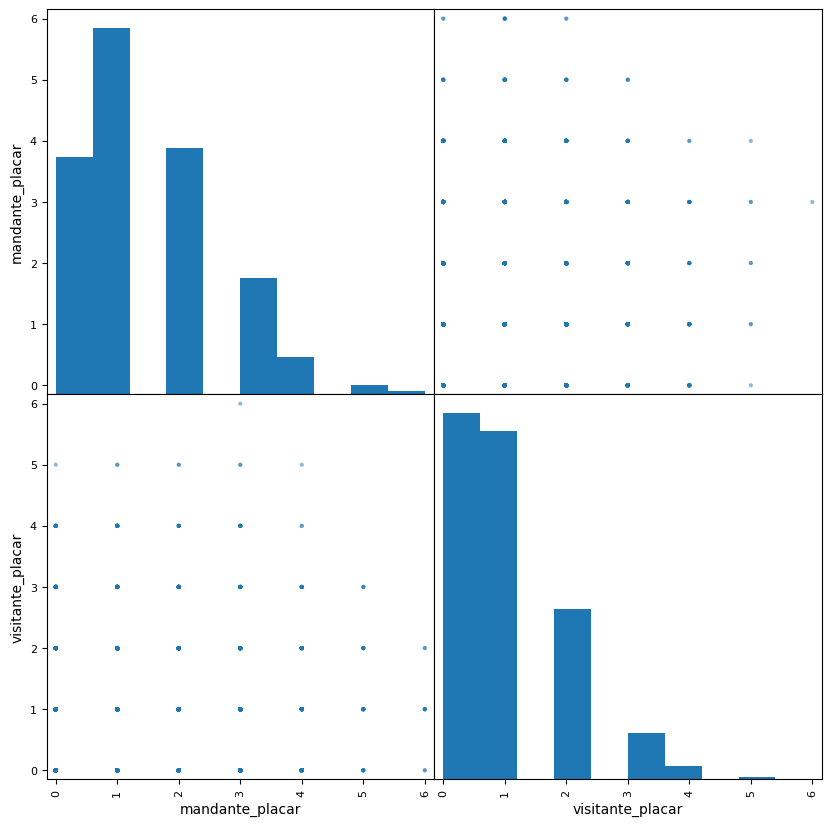

In [199]:
# Visualising distribution of data

scatter_matrix(df[['mandante_placar','visitante_placar']], figsize=(10,10))

In [200]:
#modificando o resultado para numerico
#df.loc[(df['resultado']=="V"),'resultado'] = 1
#df.loc[(df['resultado']=="D"),'resultado'] = 2
#df.loc[(df['resultado']=="E"),'resultado'] = 3

#df.loc[(df['mv']=="m"),'mandante'] = 1
#df.loc[(df['mv']=="v"),'mandante'] = 0
#df.loc[(df['mv']=="v"),'visitante'] = 1
#df.loc[(df['mv']=="m"),'visitante'] = 0

#df['mandante'] = df['mandante'].astype(int)
#df['visitante'] = df['visitante'].astype(int)
#df['resultado'] = df['resultado'].astype(int)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   partida_id                 3039 non-null   int64  
 1   rodada                     3039 non-null   int64  
 2   mandante                   3039 non-null   object 
 3   visitante                  3039 non-null   object 
 4   formacao_mandante          3035 non-null   object 
 5   formacao_visitante         3035 non-null   object 
 6   mandante_placar            3039 non-null   int64  
 7   visitante_placar           3039 non-null   int64  
 8   clube_mandante             3039 non-null   object 
 9   chutes_mandante            3039 non-null   int64  
 10  chutes_no_alvo_mandante    3039 non-null   int64  
 11  posse_de_bola_mandante     3039 non-null   float64
 12  passes_mandante            3039 non-null   int64  
 13  precisao_passes_mandante   3039 non-null   float

In [202]:
df.tail()

,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,mandante_placar,visitante_placar,clube_mandante,chutes_mandante,...,posse_de_bola_visitante,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado
3034,8021,38,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,2,1,Cuiaba,17,...,0.43,389,0.82,8,3,1,2,1,2022,1
3035,8022,38,Bragantino,Fluminense,4-2-3-1,4-2-3-1,0,1,Bragantino,13,...,0.59,463,0.82,15,2,0,0,9,2022,2
3036,8023,38,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,0,1,Corinthians,17,...,0.41,351,0.82,19,6,0,0,4,2022,2
3037,8024,38,Internacional,Palmeiras,4-2-3-1,4-2-3-1,3,0,Internacional,15,...,0.52,306,0.82,17,3,0,2,5,2022,1
3038,8025,38,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,0,4,Goias,6,...,0.65,591,0.90,14,1,0,0,4,2022,2


In [203]:
# listando features categoricas e numéricas:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['mandante', 'visitante', 'formacao_mandante', 'formacao_visitante', 'clube_mandante', 'clube_visitante']
numerical_attributes: ['partida_id', 'rodada', 'mandante_placar', 'visitante_placar', 'chutes_mandante', 'chutes_no_alvo_mandante', 'posse_de_bola_mandante', 'passes_mandante', 'precisao_passes_mandante', 'faltas_mandante', 'cartao_amarelo_mandante', 'cartao_vermelho_mandante', 'impedimentos_mandante', 'escanteios_mandante', 'rodata_visitante', 'chutes_visitante', 'chutes_no_alvo_visitante', 'posse_de_bola_visitante', 'passes_visitante', 'precisao_passes_visitante', 'faltas_visitante', 'cartao_amarelo_visitante', 'cartao_vermelho_visitante', 'impedimentos_visitante', 'escanteios_visitante', 'temporada', 'resultado']


In [204]:
#Deixar somente as variáveis numericas 
num_data  =df.drop(['partida_id','rodada','mandante', 'visitante', 'formacao_mandante', 'formacao_visitante', 'clube_mandante', 'clube_visitante'],axis=1)
num_data

,mandante_placar,visitante_placar,chutes_mandante,chutes_no_alvo_mandante,posse_de_bola_mandante,passes_mandante,precisao_passes_mandante,faltas_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,...,posse_de_bola_visitante,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado
0,2,1,13,0,0.45,326,0.00,20,2,0,...,0.55,388,0.00,21,2,0,0,5,2015,1
1,2,2,17,0,0.50,406,0.00,20,2,0,...,0.50,426,0.00,14,4,0,4,2,2015,3
2,1,0,26,11,0.74,702,0.00,9,2,0,...,0.26,250,0.00,14,0,1,1,3,2015,1
3,3,3,11,0,0.45,401,0.00,17,3,0,...,0.55,473,0.00,21,4,1,0,10,2015,3
4,3,0,10,0,0.39,335,0.00,17,1,0,...,0.61,502,0.00,17,2,0,1,11,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2,1,17,8,0.57,505,0.88,9,1,0,...,0.43,389,0.82,8,3,1,2,1,2022,1
3035,0,1,13,4,0.41,319,0.77,16,3,0,...,0.59,463,0.82,15,2,0,0,9,2022,2
3036,0,1,17,4,0.59,494,0.84,11,3,0,...,0.41,351,0.82,19,6,0,0,4,2022,2
3037,3,0,15,8,0.48,287,0.77,13,2,0,...,0.52,306,0.82,17,3,0,2,5,2022,1


In [205]:
#separa as features 
features = num_data.drop(['resultado'],axis=1)
#separa as labels
labels = num_data['resultado']


print('Features')
print (features.head())

print (" ")
print ('#############')
print (" ")


print ('Labels')
print (labels.head())

Features
   mandante_placar  visitante_placar  chutes_mandante  \
0                2                 1               13   
1                2                 2               17   
2                1                 0               26   
3                3                 3               11   
4                3                 0               10   

   chutes_no_alvo_mandante  posse_de_bola_mandante  passes_mandante  \
0                        0                    0.45              326   
1                        0                    0.50              406   
2                       11                    0.74              702   
3                        0                    0.45              401   
4                        0                    0.39              335   

   precisao_passes_mandante  faltas_mandante  cartao_amarelo_mandante  \
0                       0.0               20                        2   
1                       0.0               20                        2   
2 

In [206]:
features.isna().sum()

mandante_placar              0
visitante_placar             0
chutes_mandante              0
chutes_no_alvo_mandante      0
posse_de_bola_mandante       0
passes_mandante              0
precisao_passes_mandante     0
faltas_mandante              0
cartao_amarelo_mandante      0
cartao_vermelho_mandante     0
impedimentos_mandante        0
escanteios_mandante          0
rodata_visitante             0
chutes_visitante             0
chutes_no_alvo_visitante     0
posse_de_bola_visitante      0
passes_visitante             0
precisao_passes_visitante    0
faltas_visitante             0
cartao_amarelo_visitante     0
cartao_vermelho_visitante    0
impedimentos_visitante       0
escanteios_visitante         0
temporada                    0
dtype: int64

In [207]:
#Escoolhendo as melhores features com Kbest

features_list = ('mandante_placar','visitante_placar',
                 'chutes_mandante','chutes_no_alvo_mandante','posse_de_bola_mandante',
                 'passes_mandante','precisao_passes_mandante','faltas_mandante','cartao_amarelo_mandante',
                 'cartao_vermelho_mandante','impedimentos_mandante','escanteios_mandante',
                 'rodata_visitante','chutes_visitante','chutes_no_alvo_visitante','posse_de_bola_visitante',
                 'passes_visitante','precisao_passes_visitante','faltas_visitante','cartao_amarelo_visitante',
                 'cartao_vermelho_visitante','impedimentos_visitante','escanteios_visitante','temporada')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:27])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'visitante_placar': 1012.8889772632888, 'chutes_mandante': 946.5953732410202, 'posse_de_bola_visitante': 83.13156158154604, 'passes_visitante': 41.63960245586653, 'posse_de_bola_mandante': 36.91792314783761, 'impedimentos_mandante': 36.77085921791858, 'passes_mandante': 30.783383632044195, 'precisao_passes_visitante': 29.517054257464178, 'rodata_visitante': 17.22065214334441, 'temporada': 14.323508908641214, 'cartao_amarelo_visitante': 10.91260067503676, 'impedimentos_visitante': 10.107766708242465, 'precisao_passes_mandante': 9.208244706446436, 'cartao_amarelo_mandante': 8.507653700669877, 'chutes_no_alvo_visitante': 5.111440999295009, 'cartao_vermelho_mandante': 4.473622264032623, 'cartao_vermelho_visitante': 3.020674568004779, 'escanteios_mandante': 2.3379949158844284, 'faltas_mandante': 1.2995806441321613, 'faltas_visitante': 0.8828913667906694, 'chutes_visitante': 0.6346576553553401, 'escanteios_visitante': 0.36420596247290915, 'chutes_no_alvo_mandante': 0.112

In [208]:
#separa as features com base nas melhores features para treinamento
features  =num_data.drop(['resultado','temporada', 'cartao_amarelo_visitante', 'impedimentos_visitante', 'precisao_passes_mandante', 'cartao_amarelo_mandante', 'chutes_no_alvo_visitante', 'cartao_vermelho_mandante', 'cartao_vermelho_visitante', 'escanteios_mandante', 'faltas_mandante', 'faltas_visitante', 'chutes_visitante', 'escanteios_visitante', 'chutes_no_alvo_mandante'],axis=1)

#separa as labels para treinamento
labels = num_data['resultado']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())




Features
   mandante_placar  visitante_placar  chutes_mandante  posse_de_bola_mandante  \
0                2                 1               13                    0.45   
1                2                 2               17                    0.50   
2                1                 0               26                    0.74   
3                3                 3               11                    0.45   
4                3                 0               10                    0.39   

   passes_mandante  impedimentos_mandante  rodata_visitante  \
0              326                      3                 1   
1              406                      2                 1   
2              702                      1                 1   
3              401                      2                 1   
4              335                      1                 1   

   posse_de_bola_visitante  passes_visitante  precisao_passes_visitante  
0                     0.55               388       

In [209]:
#devido ao OVERFITING, estou realizando um Low Variance Filter como tentativa de resolução
normalize = normalize(features) 
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

0    1.216798e-04
1    1.874855e-04
2    8.090188e-05
3    4.337923e-08
4    2.193042e-02
5    7.324654e-06
6    7.708456e-03
7    4.457456e-08
8    2.275666e-02
9    4.217895e-07
dtype: float64

In [212]:
#storing the variance and name of variables
variance = data_scaled.var()
columns = features.columns

print(variance)

0    1.216798e-04
1    1.874855e-04
2    8.090188e-05
3    4.337923e-08
4    2.193042e-02
5    7.324654e-06
6    7.708456e-03
7    4.457456e-08
8    2.275666e-02
9    4.217895e-07
dtype: float64


In [220]:
#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.0: #setting the threshold as 1%
        variable.append(columns[i-1])


variable

['precisao_passes_visitante',
 'mandante_placar',
 'visitante_placar',
 'chutes_mandante',
 'posse_de_bola_mandante',
 'passes_mandante',
 'impedimentos_mandante',
 'rodata_visitante',
 'posse_de_bola_visitante',
 'passes_visitante']

In [214]:
for i in range(0,len(variance)):
    print(variance[i])

0.00012167984133667506
0.00018748547987798052
8.090187940140035e-05
4.337922611219643e-08
0.021930423269474964
7.324654332336014e-06
0.0077084560247541395
4.457456322335296e-08
0.022756662723441467
4.2178952667763853e-07


In [215]:
# criando um novo dataframe usando as variáveis ​​acima
new_data = features[variable]

 # primeiras cinco linhas dos novos dados
new_data.head() 

,precisao_passes_visitante,mandante_placar,posse_de_bola_mandante,impedimentos_mandante,posse_de_bola_visitante
0,0.0,2,0.45,3,0.55
1,0.0,2,0.50,2,0.50
2,0.0,1,0.74,1,0.26
3,0.0,3,0.45,2,0.55
4,0.0,3,0.39,1,0.61


In [221]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (3039, 10)
[[0.33333333 0.16666667 0.35135135 ... 0.6875     0.45754717 0.        ]
 [0.33333333 0.33333333 0.45945946 ... 0.625      0.50235849 0.        ]
 [0.16666667 0.         0.7027027  ... 0.325      0.29481132 0.        ]
 ...
 [0.         0.16666667 0.45945946 ... 0.5125     0.41391509 0.89130435]
 [0.5        0.         0.40540541 ... 0.65       0.36084906 0.89130435]
 [0.         0.66666667 0.16216216 ... 0.8125     0.69693396 0.97826087]]


In [222]:
X_train = features_scale[:2000 ]
X_test = features_scale[2000:2650]
y_train = labels[:2000]
y_test = labels[2000:2650]

#X_train, X_test, y_train, y_test = train_test_split(features_scale, labels, test_size=0.2, random_state=0)

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

print(labels.shape)

2000 2000
650 650
(3039,)


In [223]:
#Treinando e testando os modelos
print ('LogisticRegression')


clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

# Prediction using training data
yhat_train = clf_LR.predict(X_train)
yhat_teste  = clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

LogisticRegression
Acurácia LogisticRegression:1.0
F1 Score:1.0


In [153]:
#Testando LogistRegression hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'macro')

print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Acurácia LogisticRegression:0.45076923076923076
F1 Score:0.20714033227288794
LogisticRegression(C=0.001, max_iter=1000)


In [154]:
#Treinando e testando os modelos
print ('SVC')


clf = SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

svc_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

SVC
Acurácia SVC:0.49230769230769234
F1 Score:0.49230769230769234


In [155]:
#Testando SVC hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('F1 Score:{}'.format(f1))

print ('Acurácia LogisticRegression:{}'.format(acc))

print(clf_SVC)

F1 Score:0.45076923076923076
Acurácia LogisticRegression:0.45076923076923076
SVC(C=0.001)


In [156]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree:0.3476923076923077
F1 Score:0.33939182569347226


In [157]:
#Testando Decision tree hyper parameters
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Decision Tree
Acurácia Decision Tree:0.44461538461538463
F1 Score:0.44461538461538463
DecisionTreeClassifier(max_depth=80, max_features=2, min_samples_leaf=5,
                       min_samples_split=8)


In [158]:
#Treinando e testando os modelos
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )

Naive baeys
Acurácia Naive baeys:0.47846153846153844
F1 Score:0.47846153846153844


In [159]:
#Executando a previsao

previsao=features_scale[2650:]

game_id_full=df['partida_id']
game_id=game_id_full[2650:]

res_full=df['resultado']
res=res_full[2650:]


pred=clf_LR.predict(previsao)

df=pd.DataFrame({'real': res, 'previsao':pred, 'partida_id':game_id})

print(df)

      real  previsao  partida_id
2650     1         1        7637
2651     1         2        7638
2652     1         1        7639
2653     1         3        7640
2654     1         3        7641
...    ...       ...         ...
3034     1         1        8021
3035     2         3        8022
3036     2         2        8023
3037     1         3        8024
3038     2         3        8025

[389 rows x 3 columns]


<Axes: xlabel='previsao', ylabel='real'>

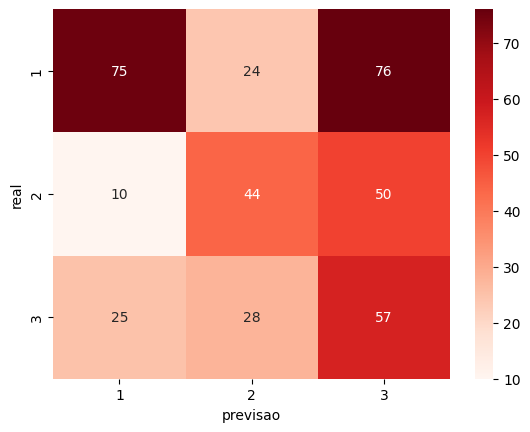

In [160]:
#confusion Matrix

df=pd.DataFrame(df,columns=['real','previsao' ])

cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Reds')

In [161]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\ADM\AppData\Local\Temp\ipykernel_7076\2920113750.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\ADM\AppData\Local\Temp\ipykernel_7076\2920113750.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.dist

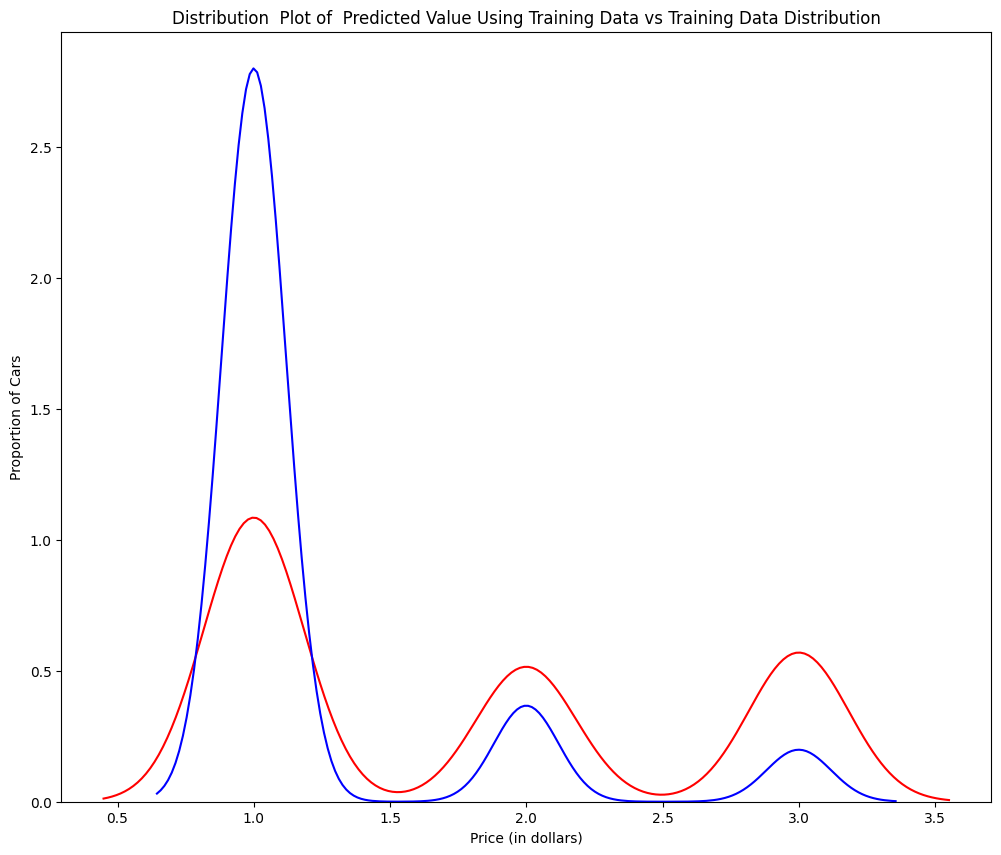

In [162]:
# Let's examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\ADM\AppData\Local\Temp\ipykernel_7076\2920113750.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\ADM\AppData\Local\Temp\ipykernel_7076\2920113750.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.dist

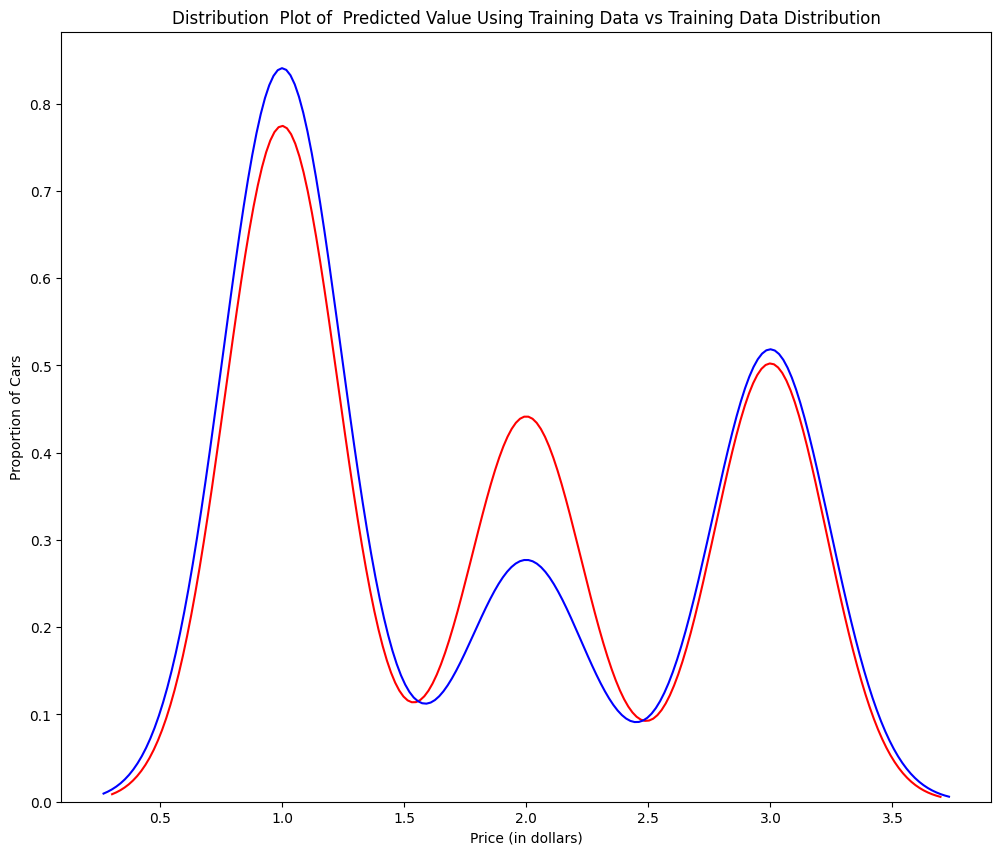

In [163]:


# Let's examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_teste, "Actual Values (teste)", "Predicted Values (teste)", Title)
